## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  92.224252   566.991314  0.526242  5.595005  1.191045
1  50.887530  1575.760095  0.693736  9.577792  1.493070
2  90.170198  1127.442452  0.064040  9.461638  0.772139
3  96.333626  1730.611812  0.150754  6.611910  1.231517
4  60.169757  1055.890735  0.315745  5.019475  1.298984


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9395627	total: 57.8ms	remaining: 57.7s
1:	learn: 0.9321088	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9254635	total: 58.8ms	remaining: 19.5s
3:	learn: 0.9172889	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9086968	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9006497	total: 60.2ms	remaining: 9.97s
6:	learn: 0.8936371	total: 60.7ms	remaining: 8.61s
7:	learn: 0.8857674	total: 61.2ms	remaining: 7.59s
8:	learn: 0.8773588	total: 61.7ms	remaining: 6.79s
9:	learn: 0.8685079	total: 62.1ms	remaining: 6.15s
10:	learn: 0.8613706	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8511506	total: 63.1ms	remaining: 5.2s
12:	learn: 0.8435206	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8367445	total: 64ms	remaining: 4.5s
14:	learn: 0.8287660	total: 64.4ms	remaining: 4.23s
15:	learn: 0.8218312	total: 64.7ms	remaining: 3.98s
16:	learn: 0.8122272	total: 65.1ms	remaining: 3.76s
17:	learn: 0.8060238	total: 65.6ms	remaining: 3.58s
18:	learn: 0.7999238	total: 66ms	remaining: 3.41

120:	learn: 0.3823658	total: 108ms	remaining: 785ms
121:	learn: 0.3808707	total: 108ms	remaining: 780ms
122:	learn: 0.3786183	total: 109ms	remaining: 777ms
123:	learn: 0.3766458	total: 109ms	remaining: 773ms
124:	learn: 0.3745711	total: 110ms	remaining: 769ms
125:	learn: 0.3723027	total: 110ms	remaining: 765ms
126:	learn: 0.3705777	total: 111ms	remaining: 761ms
127:	learn: 0.3686933	total: 111ms	remaining: 758ms
128:	learn: 0.3669269	total: 112ms	remaining: 755ms
129:	learn: 0.3645264	total: 112ms	remaining: 750ms
130:	learn: 0.3623051	total: 113ms	remaining: 747ms
131:	learn: 0.3606429	total: 113ms	remaining: 742ms
132:	learn: 0.3582851	total: 113ms	remaining: 739ms
133:	learn: 0.3562398	total: 114ms	remaining: 735ms
134:	learn: 0.3542705	total: 114ms	remaining: 731ms
135:	learn: 0.3524660	total: 115ms	remaining: 729ms
136:	learn: 0.3505328	total: 115ms	remaining: 725ms
137:	learn: 0.3488196	total: 116ms	remaining: 724ms
138:	learn: 0.3469745	total: 116ms	remaining: 720ms
139:	learn: 

297:	learn: 0.1931198	total: 185ms	remaining: 436ms
298:	learn: 0.1927282	total: 185ms	remaining: 435ms
299:	learn: 0.1923946	total: 186ms	remaining: 434ms
300:	learn: 0.1916671	total: 186ms	remaining: 433ms
301:	learn: 0.1910581	total: 187ms	remaining: 432ms
302:	learn: 0.1907095	total: 187ms	remaining: 431ms
303:	learn: 0.1904215	total: 188ms	remaining: 429ms
304:	learn: 0.1897584	total: 188ms	remaining: 429ms
305:	learn: 0.1892578	total: 189ms	remaining: 428ms
306:	learn: 0.1885386	total: 189ms	remaining: 427ms
307:	learn: 0.1880189	total: 190ms	remaining: 426ms
308:	learn: 0.1871601	total: 190ms	remaining: 425ms
309:	learn: 0.1867137	total: 190ms	remaining: 424ms
310:	learn: 0.1863845	total: 191ms	remaining: 423ms
311:	learn: 0.1861754	total: 191ms	remaining: 422ms
312:	learn: 0.1857931	total: 192ms	remaining: 421ms
313:	learn: 0.1854567	total: 192ms	remaining: 420ms
314:	learn: 0.1848483	total: 193ms	remaining: 419ms
315:	learn: 0.1845088	total: 193ms	remaining: 418ms
316:	learn: 

539:	learn: 0.0891450	total: 289ms	remaining: 246ms
540:	learn: 0.0887159	total: 290ms	remaining: 246ms
541:	learn: 0.0882938	total: 290ms	remaining: 245ms
542:	learn: 0.0878484	total: 290ms	remaining: 244ms
543:	learn: 0.0874395	total: 291ms	remaining: 244ms
544:	learn: 0.0870081	total: 291ms	remaining: 243ms
545:	learn: 0.0867660	total: 292ms	remaining: 243ms
546:	learn: 0.0863465	total: 292ms	remaining: 242ms
547:	learn: 0.0861051	total: 292ms	remaining: 241ms
548:	learn: 0.0858701	total: 293ms	remaining: 241ms
549:	learn: 0.0854610	total: 293ms	remaining: 240ms
550:	learn: 0.0852335	total: 294ms	remaining: 239ms
551:	learn: 0.0849650	total: 294ms	remaining: 239ms
552:	learn: 0.0847741	total: 295ms	remaining: 238ms
553:	learn: 0.0843886	total: 295ms	remaining: 238ms
554:	learn: 0.0840098	total: 295ms	remaining: 237ms
555:	learn: 0.0838287	total: 296ms	remaining: 236ms
556:	learn: 0.0835674	total: 296ms	remaining: 236ms
557:	learn: 0.0833892	total: 297ms	remaining: 235ms
558:	learn: 

717:	learn: 0.0571221	total: 367ms	remaining: 144ms
718:	learn: 0.0569009	total: 367ms	remaining: 143ms
719:	learn: 0.0567108	total: 367ms	remaining: 143ms
720:	learn: 0.0566836	total: 368ms	remaining: 142ms
721:	learn: 0.0565703	total: 368ms	remaining: 142ms
722:	learn: 0.0565410	total: 369ms	remaining: 141ms
723:	learn: 0.0564827	total: 369ms	remaining: 141ms
724:	learn: 0.0562820	total: 370ms	remaining: 140ms
725:	learn: 0.0560657	total: 370ms	remaining: 140ms
726:	learn: 0.0558812	total: 370ms	remaining: 139ms
727:	learn: 0.0558246	total: 371ms	remaining: 139ms
728:	learn: 0.0557689	total: 371ms	remaining: 138ms
729:	learn: 0.0555567	total: 372ms	remaining: 138ms
730:	learn: 0.0553683	total: 372ms	remaining: 137ms
731:	learn: 0.0553067	total: 373ms	remaining: 136ms
732:	learn: 0.0552521	total: 373ms	remaining: 136ms
733:	learn: 0.0551918	total: 373ms	remaining: 135ms
734:	learn: 0.0549417	total: 374ms	remaining: 135ms
735:	learn: 0.0548829	total: 374ms	remaining: 134ms
736:	learn: 

958:	learn: 0.0321534	total: 471ms	remaining: 20.1ms
959:	learn: 0.0320724	total: 471ms	remaining: 19.6ms
960:	learn: 0.0320358	total: 471ms	remaining: 19.1ms
961:	learn: 0.0319226	total: 472ms	remaining: 18.6ms
962:	learn: 0.0318423	total: 472ms	remaining: 18.1ms
963:	learn: 0.0318003	total: 473ms	remaining: 17.7ms
964:	learn: 0.0317474	total: 473ms	remaining: 17.2ms
965:	learn: 0.0317063	total: 473ms	remaining: 16.7ms
966:	learn: 0.0316190	total: 474ms	remaining: 16.2ms
967:	learn: 0.0315806	total: 474ms	remaining: 15.7ms
968:	learn: 0.0315160	total: 475ms	remaining: 15.2ms
969:	learn: 0.0314758	total: 475ms	remaining: 14.7ms
970:	learn: 0.0313899	total: 475ms	remaining: 14.2ms
971:	learn: 0.0313523	total: 476ms	remaining: 13.7ms
972:	learn: 0.0312164	total: 476ms	remaining: 13.2ms
973:	learn: 0.0311773	total: 477ms	remaining: 12.7ms
974:	learn: 0.0310199	total: 477ms	remaining: 12.2ms
975:	learn: 0.0309829	total: 478ms	remaining: 11.7ms
976:	learn: 0.0309466	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

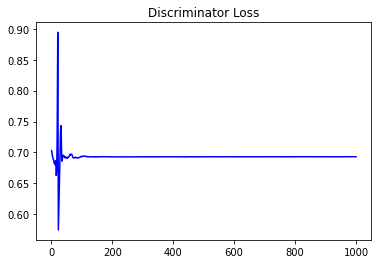

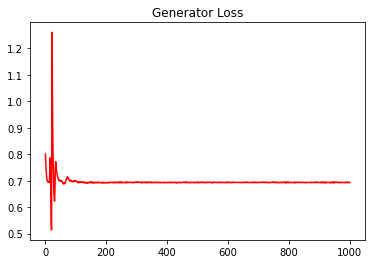

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.7201654968580192


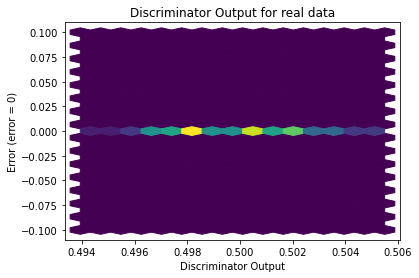

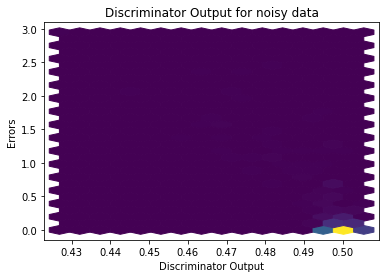

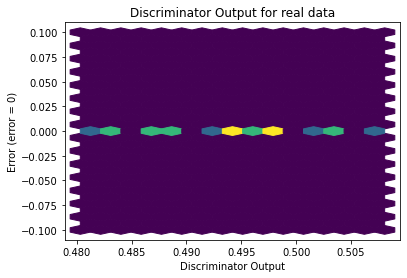

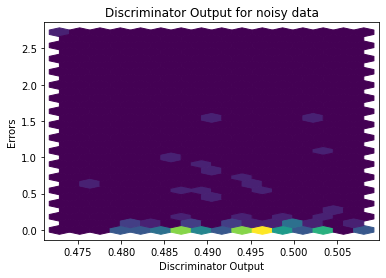

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


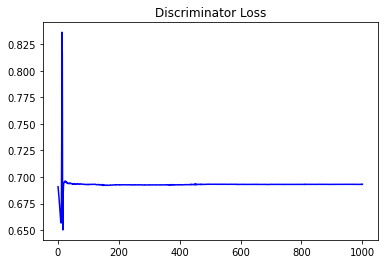

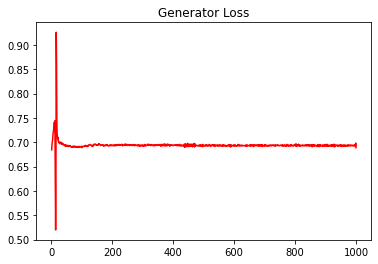

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.9446586315298097


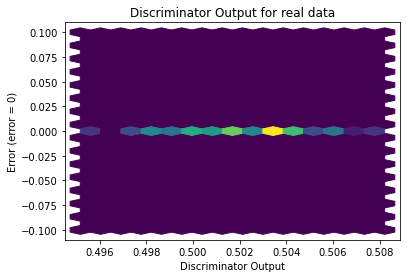

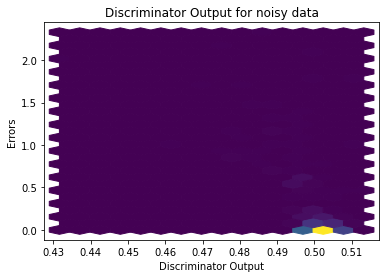

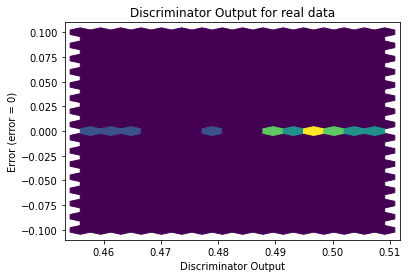

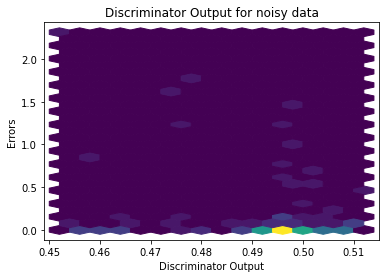

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0691]], requires_grad=True)
